# Data Analysis Examples

Now that we've reached th end of the book's main chapters, we're going to take a look at a number of real-world datasets. For each dataset, we'll use the techniques presented in this book to extract  meaning from the raw data. The demonstrated techniques can be applied to all manner of the other datasets, including your own. This chapter contains a collection of miscellaneous example datasets that you can use for practice with the tools ion this book.
The examples datasets are found in the book's accompanying GitHub repository (http://github.com/wesm/pydata-book)

## USA.gov Data from Bitly

In [1]:
path = '../datasets/bitly_usagov/example.txt'

In [2]:
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [3]:
import json
path = '../datasets/bitly_usagov/example.txt'
records = [json.loads(line) for line in open(path)]

In [4]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

### Counting Time Zones in Pure Python

In [5]:
# time_zones = [rec['tz'] for rec in records]

In [6]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [7]:
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [8]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else: 
            counts[x] = 1
    return counts

In [9]:
from collections import defaultdict

In [10]:
def get_counts2(sequence):
    counts = defaultdict(int) # values will initialize to 0
    for x in sequence: 
        counts[x] += 1
    return counts

In [11]:
counts = get_counts(time_zones)

In [12]:
counts['America/New_York']

1251

In [13]:
len(time_zones)

3440

In [14]:
def top_counts(count_dict,n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [15]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [16]:
from collections import Counter

In [17]:
counts = Counter(time_zones)

In [18]:
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

### Counting Time Zones with pandas

In [19]:
import pandas as pd

In [20]:
frame = pd.DataFrame(records)

In [21]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
_heartbeat_    120 non-null float64
a              3440 non-null object
al             3094 non-null object
c              2919 non-null object
cy             2919 non-null object
g              3440 non-null object
gr             2919 non-null object
h              3440 non-null object
hc             3440 non-null float64
hh             3440 non-null object
kw             93 non-null object
l              3440 non-null object
ll             2919 non-null object
nk             3440 non-null float64
r              3440 non-null object
t              3440 non-null float64
tz             3440 non-null object
u              3440 non-null object
dtypes: float64(4), object(14)
memory usage: 500.7+ KB


In [22]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [23]:
tz_counts = frame['tz'].value_counts()

In [24]:
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [25]:
import seaborn as sns

In [26]:
subset = tz_counts[:10]

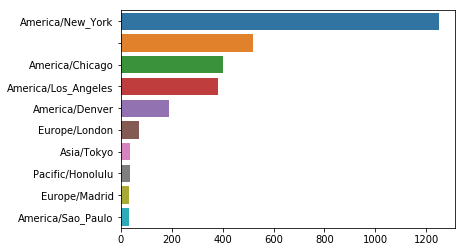

In [27]:
sns.barplot(y=subset.index,x=subset.values)

In [28]:
frame['a'][1]

'GoogleMaps/RochesterNY'

In [29]:
frame['a'][50]

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [30]:
frame['a'][51][:50]

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

In [33]:
results = pd.Series([x.split()[0] for x in frame.a.dropna()])

In [34]:
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [36]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [39]:
cframe = frame[frame.a.notnull()]

In [40]:
import numpy as np

In [41]:
cframe['os'] = np.where(cframe['a'].str.contains('Windows'),
                       'Windows','Not Windows')

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [42]:
cframe['os'][:5]

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

In [43]:
by_tz_os = cframe.groupby(['tz','os'])

In [44]:
agg_counts = by_tz_os.size().unstack().fillna(0)

In [45]:
agg_counts[:10]

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [46]:
# Use to sort in ascending order
indexer = agg_counts.sum(1).argsort()

In [47]:
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

## MovieLens 1M Dataset

### Measuring Rating Disagreement

## US Baby Names 1880-2010

### Analyzing Naming Trends

## USDA Food Database

## 2012 Federal Election Commission Database

### Donation Statistics by Occupation and Employer

### Bucketing Donation Amounts

### Donation Statistics by State